Let us start with creating a reference solution. The goal of the evolution will be to find this solution. First take a look at the code used for creating one solution. An array with equal number of zeros and ones is created.

In [1]:
import random
import numpy as np

def create_reference_solution(chromosome_length):

    number_of_ones = int(chromosome_length / 2)

    # Build an array with an equal mix of zero and ones
    reference = np.zeros(chromosome_length)
    reference[0: number_of_ones] = 1

    # Shuffle the array to mix the zeros and ones
    np.random.shuffle(reference)
    
    return reference

*Now* let us try to use it, let us create several reference solutions (of different lengths).

In [2]:
# Print an example target array
print (create_reference_solution(70))

[1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]


# Standard Distribution 
Now let us focus on creating a starting population. (-1,1)

In [3]:

def create_starting_population(individuals, chromosome_length):
    # Set up an initial array of all zeros
    population = 2 * np.random.random((individuals, chromosome_length)) - 1
    # Loop through each row (individual)
    #for i in range(individuals):
        # Choose a random number of ones to create
        #ones = random.randint(0, chromosome_length)
        # Change the required number of zeros to ones
        #population[i, 0:ones] = 1
        # Sfuffle row
        #np.random.shuffle(population)
    np.random.shuffle(population)
    return population



Let's try to use the code above to create sample populations. Of course this should be a two-dimensional array of genotypes. Let us change the number of individuals and the length of chromosomes.

In [4]:
print (create_starting_population(4, 10))

[[ 0.13513397 -0.18665614  0.23807105 -0.66834683  0.90954152 -0.9681912
   0.14371197 -0.01403547  0.90951701  0.3516229 ]
 [ 0.2337567  -0.53856263 -0.0136459   0.81854314 -0.47236274 -0.15680274
   0.87749204  0.54986577  0.24752028 -0.23853125]
 [ 0.60906798  0.95908003 -0.51958833 -0.27834822  0.56402577  0.92582187
  -0.37645883  0.21017704 -0.48542642 -0.59523301]
 [-0.02212459 -0.31543273 -0.85521796 -0.50631201  0.52459387 -0.28761337
   0.79523501  0.72140787 -0.95546893 -0.2496954 ]]


# DeJong
Now let us calculate fitness of such defined population.

In [5]:
def calculate_fitness(population):
    # Create an array of True/False compared to reference
    #identical_to_reference = population == reference
    # Sum number of genes that are identical to the reference
    #fitness_scores = identical_to_reference.sum(axis=1)
    fitness_scores = np.zeros(len(population))
    for i in range(len(population)):
      current_fitness = 0
      for j in range(len(population[i])):
        current_fitness += population[i][j] * population[i][j]
      fitness_scores[i] = current_fitness

    return fitness_scores

And try this function. Note that for 2d arrays, axis=0 will sum the "columns" while axis=1 will sum the "rows". fitness_scores will thus hold the number of genes equal to the reference.

In [6]:
# reference = create_reference_solution(10)
# print ('Reference solution: \n', reference)
population = create_starting_population(6, 10)
print ('\nStarting population: \n', population)
scores = calculate_fitness(population)
print('\nScores: \n', scores)


Starting population: 
 [[ 0.27102363 -0.92703606  0.00333265  0.68698664  0.94814337 -0.07866012
  -0.0459506   0.21604767  0.08943397  0.75056763]
 [-0.64626029  0.51566067 -0.48979681 -0.67342642 -0.46105554  0.7939793
   0.75965437  0.53539561  0.23146026  0.56144233]
 [-0.67438947  0.60543298 -0.31278732 -0.13804525  0.31252524  0.27429884
   0.98041399  0.73301848 -0.80609683 -0.42367001]
 [ 0.62492997 -0.36326093 -0.1596959  -0.77036364 -0.77601058  0.92113866
   0.84211113 -0.651867   -0.58784436  0.95430943]
 [ 0.13808352  0.31180357  0.5952516   0.57020381 -0.86231239 -0.66651187
  -0.10127843 -0.24820194 -0.14664884  0.42574686]
 [ 0.42730725 -0.02855704 -0.82741648  0.03869403 -0.73050822 -0.17349517
   0.2269326   0.75970584  0.4689745   0.79662231]]

Scores: 
 [2.93011294 3.45245227 3.43897058 4.98249695 2.25819388 2.91646064]


# Selection
The code for defining the selection method follows. This is a tournament selection. Now we are minimizing

In [7]:
def select_individual_by_tournament(population, scores):
    # Get population size
    population_size = len(scores)
    
    # Pick individuals for tournament
    fighter_1 = random.randint(0, population_size-1)
    fighter_2 = random.randint(0, population_size-1)
    
    # Get fitness score for each
    fighter_1_fitness = scores[fighter_1]
    fighter_2_fitness = scores[fighter_2]
    
    # Identify undividual with highest fitness
    # Fighter 1 will win if score are equal
    #if fighter_1_fitness >= fighter_2_fitness:
    if fighter_1_fitness <= fighter_2_fitness:    
        winner = fighter_1
    else:
        winner = fighter_2
    
    # Return the chromosome of the winner
    return population[winner, :]

Let us try this.

In [8]:
# Set up and score population
#reference = create_reference_solution(10)
population = create_starting_population(6, 10)
scores = calculate_fitness(population)

# Pick two parents and display
parent_1 = select_individual_by_tournament(population, scores)
parent_2 = select_individual_by_tournament(population, scores)
print (parent_1)
print (parent_2)

[ 0.15596146  0.1538344  -0.17656867 -0.22245966 -0.42065797 -0.69547641
 -0.1558655  -0.13046287  0.93172311 -0.51272339]
[-0.68248456  0.18049505 -0.39881297  0.09462809 -0.46608832  0.70794848
  0.10240369 -0.56181148  0.42776068 -0.93365626]


Let us define the crossover method. Hstack puts together two arrays horizontally (thus creating new one).

In [9]:
def breed_by_crossover(parent_1, parent_2):
    # Get length of chromosome
    chromosome_length = len(parent_1)
    
    # Pick crossover point, avoding ends of chromsome
    crossover_point = random.randint(1,chromosome_length-1)
    
    # Create children. np.hstack joins two arrays
    child_1 = np.hstack((parent_1[0:crossover_point],
                        parent_2[crossover_point:]))
    
    child_2 = np.hstack((parent_2[0:crossover_point],
                        parent_1[crossover_point:]))
    
    # Return children
    return child_1, child_2

And test this of course.

In [10]:
# Set up and score population
#reference = create_reference_solution(15)
population = create_starting_population(100, 15)
scores = calculate_fitness(population)

# Pick two parents and dispplay
parent_1 = select_individual_by_tournament(population, scores)
parent_2 = select_individual_by_tournament(population, scores)

# Get children
child_1, child_2 = breed_by_crossover(parent_1, parent_2)

# Show output
print ('Parents')
print (parent_1)
print (parent_2)
print ('Children')
print (child_1)
print (child_2)

Parents
[ 0.33902461 -0.72807673 -0.641672    0.4279166   0.51789622  0.90965427
  0.48862402  0.41352952  0.66056005 -0.24239471  0.01659727  0.70997961
  0.87500356 -0.73533144  0.46633438]
[-0.25258075 -0.12837891 -0.72938104 -0.6240749  -0.90595642  0.31180129
  0.56648672  0.08327117  0.05365932  0.39071585 -0.45281769  0.33111511
  0.73227644 -0.21843667  0.40018581]
Children
[ 0.33902461 -0.72807673 -0.641672    0.4279166   0.51789622  0.90965427
  0.48862402  0.41352952  0.66056005 -0.24239471  0.01659727  0.70997961
  0.73227644 -0.21843667  0.40018581]
[-0.25258075 -0.12837891 -0.72938104 -0.6240749  -0.90595642  0.31180129
  0.56648672  0.08327117  0.05365932  0.39071585 -0.45281769  0.33111511
  0.87500356 -0.73533144  0.46633438]


Now the procedure for random mutation follows. Roulette

In [11]:
# def randomly_mutate_population(population, mutation_probability):
    
#     # Apply random mutation
#         random_mutation_array = np.random.random(
#             size=(population.shape))
        
#         random_mutation_boolean = \
#             random_mutation_array <= mutation_probability

#         population[random_mutation_boolean] = \
#         np.logical_not(population[random_mutation_boolean])
        
#         # Return mutation population
#         return population

def randomly_mutate_population(population, mutation_probability):
  for i in range (len(population)):
    for j in range (len(population[i])):
      if (random.uniform(0,1) < mutation_probability ):
        population[i][j] += random.uniform(-0.05, 0.05)
  
  return population

And let us test this one too.

In [13]:
# Set up and score population
reference = create_reference_solution(15)
population = create_starting_population(100, 15)
scores = calculate_fitness(population)

# Pick two parents and display
parent_1 = select_individual_by_tournament(population, scores)
parent_2 = select_individual_by_tournament(population, scores)

# Get children and make new population 
child_1, child_2 = breed_by_crossover(parent_1, parent_2)
population = np.stack((child_1, child_2))

# Mutate population
mutation_probability = 0.25
print ("Population before mutation")
print (population)
population = randomly_mutate_population(population, mutation_probability)
print ("Population after mutation")
print (population)

Population before mutation
[[-0.94656947  0.35481641  0.28800491 -0.0688045   0.54519283  0.16827169
  -0.79211343  0.95889587  0.13585387  0.34808814  0.44812989  0.08673957
   0.31778158 -0.06428275 -0.38848348]
 [-0.63487232 -0.1786624   0.85326302  0.0338572  -0.51247008  0.67841316
  -0.41809108  0.85761313  0.97053152  0.09956611 -0.78791824  0.36785761
   0.84805643  0.9995865   0.00171676]]
Population after mutation
[[-0.899214    0.35481641  0.28800491 -0.0688045   0.54519283  0.15831453
  -0.79211343  0.95889587  0.13585387  0.31907117  0.49661196  0.08673957
   0.31778158 -0.02053097 -0.38848348]
 [-0.63487232 -0.22459607  0.87283012  0.0338572  -0.51247008  0.67841316
  -0.41327127  0.85761313  0.97053152  0.09956611 -0.78791824  0.36785761
   0.84805643  1.01712877  0.00171676]]


The code of the main algorithm follows.

In [14]:
# *************************************
# ******** MAIN ALGORITHM CODE ********
# *************************************

# Set general parameters
chromosome_length = 75
population_size = 500
maximum_generation = 200
best_score_progress = [] # Tracks progress

# Create reference solution 
# (this is used just to illustrate GAs)
#reference = create_reference_solution(chromosome_length)

# Create starting population
population = create_starting_population(population_size, chromosome_length)

# Display best score in starting population
scores = calculate_fitness(population)
best_score = np.min(scores)/chromosome_length * 100
print ('Starting best score, % target: ',best_score)

# Add starting best score to progress tracker
best_score_progress.append(best_score)

# Now we'll go through the generations of genetic algorithm
for generation in range(maximum_generation):
    # Create an empty list for new population
    new_population = []
    
    # Create new popualtion generating two children at a time
    for i in range(int(population_size/2)):
        parent_1 = select_individual_by_tournament(population, scores)
        parent_2 = select_individual_by_tournament(population, scores)
        child_1, child_2 = breed_by_crossover(parent_1, parent_2)
        new_population.append(child_1)
        new_population.append(child_2)
    
    # Replace the old population with the new one
    population = np.array(new_population)

    # Apply mutation
    mutation_rate = 0.005
    population = randomly_mutate_population(population, mutation_rate)
    
    # Score best solution, and add to tracker
    scores = calculate_fitness(population)
    best_score = np.min(scores)/chromosome_length * 100
    best_score_progress.append(best_score)

# GA has completed required generation
print ('End best score, % target: ', best_score)


Starting best score, % target:  23.59363438556044
End best score, % target:  0.29658666475100465


<Figure size 640x480 with 1 Axes>

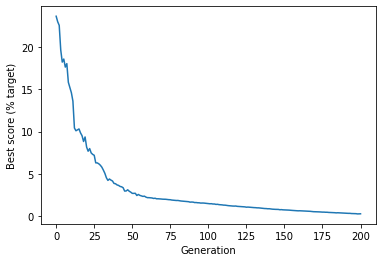

In [15]:
# Plot progress
import matplotlib.pyplot as plt
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()

Adapted from: [https://pythonhealthcare.org/](https://pythonhealthcare.org/) prepared by Michael Allen 
m.allen@exeter.ac.uk